<a href="https://colab.research.google.com/github/medhanie/datascience-dviz/blob/develop/geodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 12.9 MB/s 
     |████████████████████████████████| 16.7 MB 71.3 MB/s 
     |████████████████████████████████| 6.3 MB 68.9 MB/s 


In [2]:
import geopandas as gpd

In [3]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


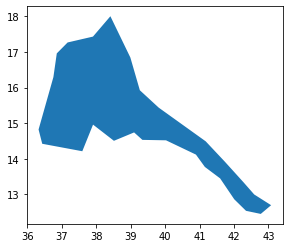

In [5]:
eritrea = world.loc[world['name'] == 'Eritrea']
boundaries = eritrea['geometry']
eritrea.plot()

In [10]:
pip install datapackage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 68 kB 9.0 MB/s 
     |████████████████████████████████| 72 kB 776 kB/s 
     |████████████████████████████████| 41 kB 777 kB/s 
     |████████████████████████████████| 132 kB 85.4 MB/s 
     |████████████████████████████████| 126 kB 76.1 MB/s 
     |████████████████████████████████| 9.0 MB 68.3 MB/s 
     |████████████████████████████████| 79 kB 13.2 MB/s 
     |████████████████████████████████| 127 kB 81.7 MB/s 
  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7400 sha256=a12aa88195f9eb71a51b3f662029435ac2f8351b208ae5606789647e9a871642
  Stored in directory: /root/.cache/pip/wheels/dd/0a/62/49ee84fab92057fb3e303fb1a59e75ccac6899b417f441305a
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10768 sha256=5a30c60bf556ca846a901167cb49d0

In [16]:
import datapackage
import pandas as pd

df = gpd.read_file('/content/drive/MyDrive/datascience/countries.geojson')

df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [20]:
eritrea = df.loc[df['ADMIN'] == 'Eritrea']
print(eritrea)

      ADMIN ISO_A3                                           geometry
69  Eritrea    ERI  MULTIPOLYGON (((40.02622 15.88264, 40.06267 15...


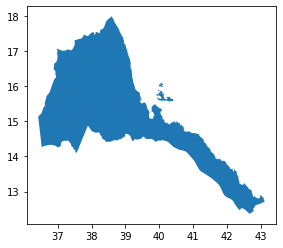

In [ ]:
boundaries = eritrea['geometry']
eritrea.plot()

In [24]:
df.shape

(255, 3)

# New Section